# Detecting Breast Cancer with Data Science 

In [193]:
import pandas as pd
from sklearn import svm
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, roc_curve, roc_auc_score
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1234)
%matplotlib inline

In [194]:
df = pd.read_csv("C:/Users/noay/PycharmProjects/BreastCancer/data.csv")

In [195]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [196]:
df.groupby(['diagnosis']).size()

diagnosis
B    357
M    212
dtype: int64

alot of parameters are dependent

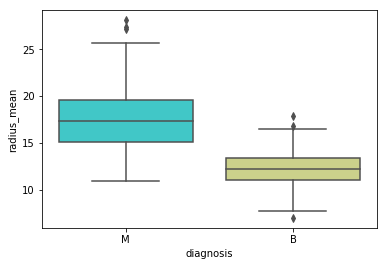

In [197]:
sns.boxplot(x='diagnosis',y='radius_mean',data=df, palette='rainbow')

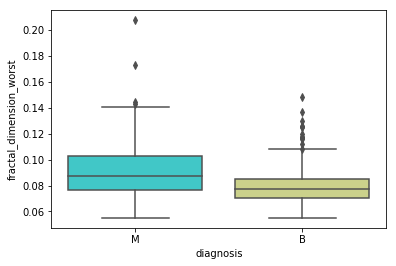

In [198]:
sns.boxplot(x='diagnosis',y='fractal_dimension_worst',data=df, palette='rainbow')

In [199]:
df.groupby('diagnosis').mean()['smoothness_worst']

diagnosis
B    0.124959
M    0.144845
Name: smoothness_worst, dtype: float64

In [200]:
df.dropna(axis=1, inplace=True)
X = df.iloc[:, 2:]
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

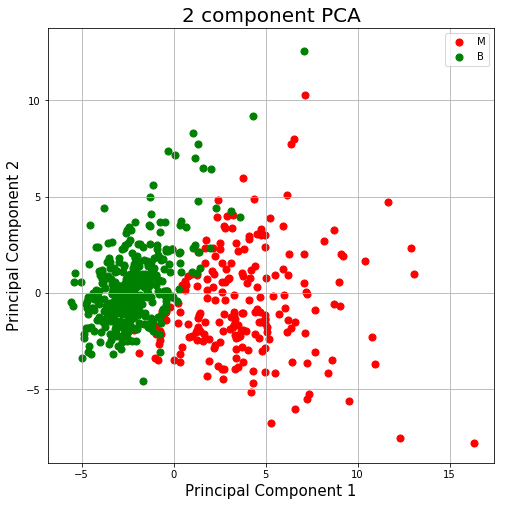

In [201]:
X = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['diagnosis']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['M', 'B']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['diagnosis'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [202]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [203]:
precision_recall_fscore_support(y_test, y_pred, average='macro', labels='M')

(0.9736842105263158, 0.8809523809523809, 0.925, None)

In [204]:
confusion_matrix(y_test, y_pred)

array([[71,  1],
       [ 5, 37]], dtype=int64)

In [205]:
y_pred_costume_theshold = (clf.predict_proba(X_test)[:,1] >= 0.2).astype(bool) # set threshold as 0.2
y_test_costume_theshold = (y_test == 'M')
precision_recall_fscore_support(y_test_costume_theshold, y_pred_costume_theshold)

(array([0.97183099, 0.93023256]),
 array([0.95833333, 0.95238095]),
 array([0.96503497, 0.94117647]),
 array([72, 42], dtype=int64))

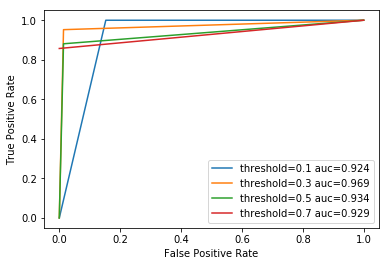

In [206]:
for threshold in np.arange(0.1, 0.9, 0.2):
    y_pred_costume_theshold = (clf.predict_proba(X_test)[:,1] >= threshold).astype(bool)
    y_test_costume_theshold = (y_test == 'M')
    fpr, tpr, _ = roc_curve(y_test_costume_theshold, y_pred_costume_theshold)
    auc = roc_auc_score(y_test_costume_theshold, y_pred_costume_theshold)
    plt.plot(fpr,tpr,label="threshold="+str(round(threshold,2)) +" auc="+str(round(auc,3)))
plt.legend(loc=4)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Breast Cancer Wisconsin (Diagnostic) Data Set
https://www.kaggle.com/uciml/breast-cancer-wisconsin-data